In [49]:
import pandas as pd
pd.options.display.max_colwidth = 400
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns 
import matplotlib.pyplot as plt

In [50]:
senti = SentimentIntensityAnalyzer()

In [51]:
movies_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
movies_df.head()
movies_df.dropna()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an entertaining introduction to a promising new world -- but will the consuming shadow of Potter be too big to break free of?"
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transparent and slapdash than this wannabe-franchise jumpstarter directed by Chris Columbus.
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a good one, trotting out kernels of Greek mythology like so many Disney Channel references."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights and things exploding, [Columbus] squeezes in a few well-meaning pause breaks about friendship and absent fathers before swiftly moving on to the next pyrotechnics display."
...,...,...,...,...,...,...,...,...
1130004,m/zulu,Tony Sloman,False,Radio Times,Fresh,5/5,2017-07-10,The movie is a revelation.
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictment of British imperialism, but it seems a remarkably forward-thinking work."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of the Cy Endfield directed Zulu (1964).
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and the war. The former is concerned with a lot of British derring-do and priggish behavior. The latter consists of battle scenes with a lot of kinetic energy but not as much emotional punch as they should have."


In [52]:
movies_df["review_content"]=movies_df["review_content"].apply(str)

In [53]:
def calculate_sentiment(text): 
    s_scores = senti.polarity_scores(text)
    #extract compound score 
    compound_scores = s_scores['compound']
    return compound_scores

In [54]:
#test
calculate_sentiment('I hate you')

-0.5719

In [55]:
movies_df['sentiment_score'] = movies_df['review_content'].apply(calculate_sentiment)

In [17]:
movies_df.sort_values(by='sentiment_score', ascending=False)[:10]

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,sentiment_score
926816,m/the_artist,Deborah Ross,False,The Spectator,Fresh,NaN,2015-02-17,"Glorious, delicious and an unalloyed joy... I loved it. Loved it, loved it, loved it, loved it, loved it, loved it, loved it.",0.9927
170217,m/bedtime_stories,James Rocchi,False,Redbox,Rotten,2/5,2008-12-24,"Bedtime Stories tries to be charming and whimsical, but while charm and whimsy, like love, can be helped by great sums of money, charm and whimsy, like love, cannot be created by great sums of money.",0.9912
245430,m/clash_of_the_titans_2,R.L. Shaffer,False,IGN DVD,Fresh,7/10,2012-06-29,"Certainly sloppy, but visually rich, exciting and, thanks to several great supporting roles, a better, more character-driven tale that tops the original despite a more intimate feel.",0.9895
374517,m/gifted_2017,Louise Keller,False,Urban Cinefile,Fresh,NaN,2017-08-29,"The story may play out by the numbers, but thanks to a superb cast (and astute direction by The Amazing Spiderman's Marc Webb), Gifted is a welcome package: entertaining, engaging, sweetly funny and moving.",0.9894
1023436,m/the_triumph_of_love,Michael Dequina,False,Film Threat,Fresh,3/5,2002-12-08,"The Triumph of Love is, indeed, a triumph of love: love of performance, love of joy, and, above all else, love of love itself.",0.9892
85879,m/20000_days_on_earth,Ray Pride,False,Newcity,Fresh,NaN,2014-10-15,"It sounds like so much attenuated tosh, but this bold, unique gem is bright, funny, brooding, hopeful, momentarily visionary, a wounded beauty exploring the creative process in a fresh and oft-brilliant fashion.",0.9888
1071645,m/up,Avi Offer,False,NYC Movie Guru,Fresh,8/10,2009-05-29,"Fun, thrilling, imaginative and tender with breathtaking CGI effects, but it's much funnier and exhilarating for kids. Adults will be often amused, but they'll find that it lacks the ""wow!"" factor, brilliance and genuine warmth of a truly classic Pixar...",0.9888
538284,m/love_rosie,Isaac Feldberg,False,We Got This Covered,Fresh,7/10,2015-02-03,"Cynics should steer clear, but Love, Rosie boasts two charming leads, a genuinely sweet tenor and such a warm blend of humor and heart that it could easily become a new teen favorite.",0.9887
748860,m/rush_2013,Ian Freer,False,Empire Magazine,Fresh,4/5,2013-09-09,"It rarely deviates from formula, but Rush wins big, delivering the most exciting F1 footage created for film. Like Hunt, it is sexy, funny, full of thrills. Like Lauda, it is intelligent, a bit blunt, but ultimately touching.",0.9887
748857,m/rush_2013,Ian Freer,False,Empire Magazine,Fresh,4/5,2013-09-09,"It rarely deviates from formula, but Rush wins big, delivering the most exciting F1 footage created for film. Like Hunt, it is sexy, funny, full of thrills. Like Lauda, it is intelligent, a bit blunt, but ultimately touching.",0.9887


In [18]:
movies_df.sort_values(by='sentiment_score', ascending=True)[:10]
movies_df.dropna()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,sentiment_score
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an entertaining introduction to a promising new world -- but will the consuming shadow of Potter be too big to break free of?",0.7050
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transparent and slapdash than this wannabe-franchise jumpstarter directed by Chris Columbus.,0.0000
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a good one, trotting out kernels of Greek mythology like so many Disney Channel references.",0.7143
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative",0.5994
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights and things exploding, [Columbus] squeezes in a few well-meaning pause breaks about friendship and absent fathers before swiftly moving on to the next pyrotechnics display.",0.3400
...,...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,nan,0.0000
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictment of British imperialism, but it seems a remarkably forward-thinking work.",-0.0286
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of the Cy Endfield directed Zulu (1964).,0.0000
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and the war. The former is concerned with a lot of British derring-do and priggish behavior. The latter consists of battle scenes with a lot of kinetic energy but not as much emotional punch as they should have.",-0.7018


In [19]:
movies_df['review_date'] = pd.to_datetime(movies_df['review_date'])

#make date the index 
movies_df = movies_df.set_index('review_date')


<AxesSubplot:title={'center':'Movie Review Sentiment Overtime (Month)'}, xlabel='review_date', ylabel='Movie Sentiment Score'>

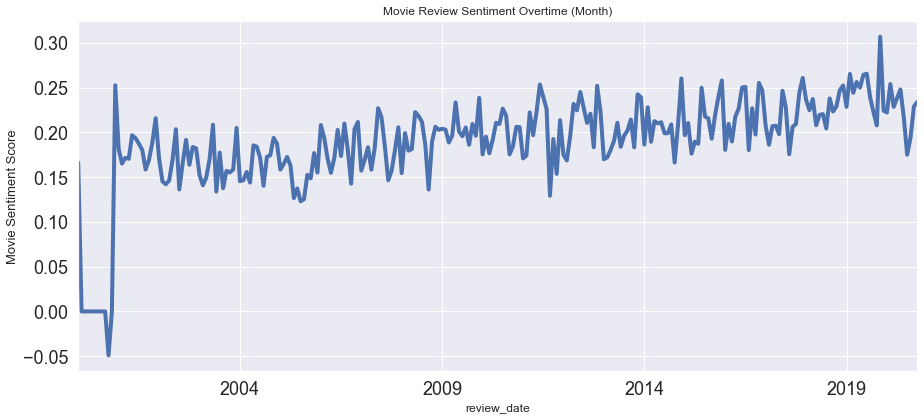

In [20]:
sns.set()
plt.figure(figsize=(13,6))
plt.ylabel('Movie Sentiment Score', fontsize=13)
movies_df.loc['2000':'2020'].resample('M')['sentiment_score'].mean().plot(title="Movie Review Sentiment Overtime (Month)", linewidth=4, fontsize=18)

<AxesSubplot:title={'center':'Movie Review Sentiment Overtime (Year)'}, xlabel='review_date', ylabel='Mean Sentiment Score'>

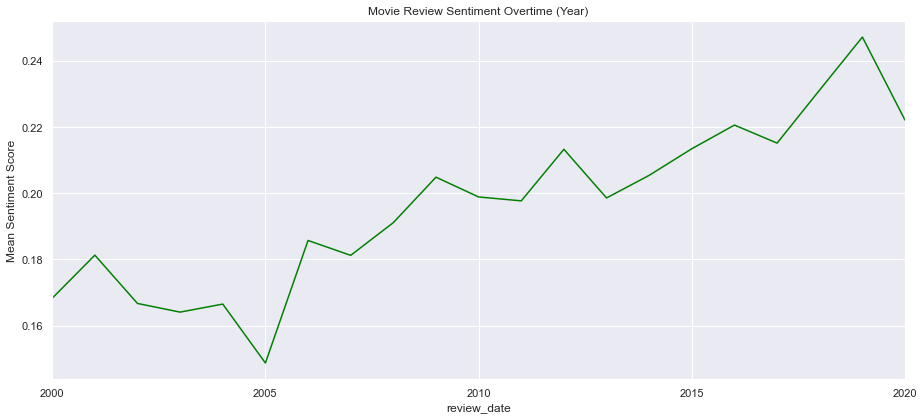

In [21]:
sns.set()
plt.figure(figsize=(13,6))
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
movies_df.loc['2000':'2020'].resample('Y')['sentiment_score'].mean().plot(title="Movie Review Sentiment Overtime (Year)", color='green')

In [43]:
movies = pd.read_csv('rotten_tomatoes_movies.csv')
movies

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning Thief,"Always trouble-prone, the life of teenager Percy Jackson (Logan Lerman) gets a lot more complicated when he learns he's the son of the Greek god Poseidon. At a training ground for the children of deities, Percy learns to harness his divine powers and prepare for the adventure of a lifetime: he must prevent a feud among the Olympians from erupting into a devastating war on Earth, and rescue his...","Though it may seem like just another Harry Potter knockoff, Percy Jackson benefits from a strong supporting cast, a speedy plot, and plenty of fun with Greek mythology.",PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Daddario, Jake Abel, Sean Bean, Pierce Brosnan, Steve Coogan, Rosario Dawson, Melina Kanakaredes, Catherine Keener, Kevin Mckidd, Joe Pantoliano, Uma Thurman, Ray Winstone, Julian Richings, Bonita Friedericy, Annie Ilonzeh, Tania Saulnier, Marie Avgeropoulos, Luisa D'Oliveira, Christie Laing, Marielle Jaffe, Elisa King, Chrystal Tisiga, Alexis Knapp,...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,"Kate (Catherine Keener) and her husband Alex (Oliver Platt) are wealthy New Yorkers who prowl estate sales and make a tidy profit reselling items they bought cheaply. They buy the apartment next door and plan to remodel just as soon as its current occupant, a cranky old woman, dies. Kate is troubled by the way she and her husband earn a living, and tries to assuage her guilt by befriending her...","Nicole Holofcener's newest might seem slight in places, but its rendering of complex characters in a conflicted economic landscape is varied, natural, and touching all the same.",R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, Rebecca Hall, Sarah Steele, Ann Morgan Guilbert, Kevin Corrigan, Lois Smith",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter falls hopelessly in love with the woman of his dreams, and even follows the girl and her new husband to their Mexican honeymoon resort. While his behavior seems sure to land him in trouble, out of the blue fate plays into his hands.","Blake Edwards' bawdy comedy may not score a perfect 10, but Dudley Moore's self-deprecating performance makes this midlife crisis persistently funny.",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert Webber, Dee Wallace, Sam Jones III, Sam J. Jones, Brian Dennehy, Max Showalter, Rad Daly, Nedra Volz, James Noble, Virginia Kiser, John Hawker, Deborah Rush, Don Calfa, Walter George Alton, Annette Martin, John Hancock, Lorry Goldman, Arthur Rosenberg, Mari Gorman, Marcy Hanson, Julia Jennings, Senilo Tanney, Kitty DeCarlo, William Lucking, Owen Su...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"Following the closing arguments in a murder trial, the 12 members of the jury must deliberate, with a guilty verdict meaning death for the accused, an inner-city teen. As the dozen men try to reach a unanimous decision while sequestered in a room, one juror (Henry Fonda) casts considerable doubt on elements of the case. Personal issues soon rise to the surface, and conflict threatens to derail...","Sidney Lumet's feature debut is a superbly written, dramatically effective courtroom thriller that rightful

In [44]:
new_movies = pd.merge(movies_df, movies[['rotten_tomatoes_link','movie_title']], on='rotten_tomatoes_link', how='left')
new_movies

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_content,sentiment_score,movie_title
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyone around 15 (give or take a couple of years) will thrill to the visual spectacle,0.7579,Percy Jackson & the Olympians: The Lightning Thief
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,"Uma Thurman as Medusa, the gorgon with a coiffure of writhing snakes and stone-inducing hypnotic gaze is one of the highlights of this bewitching fantasy",0.0000,Percy Jackson & the Olympians: The Lightning Thief
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,"With a top-notch cast and dazzling special effects, this will tide the teens over until the next Harry Potter instalment.",0.4019,Percy Jackson & the Olympians: The Lightning Thief
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,"Whether audiences will get behind The Lightning Thief is hard to predict. Overall, it's an entertaining introduction to a promising new world -- but will the consuming shadow of Potter be too big to break free of?",0.7050,Percy Jackson & the Olympians: The Lightning Thief
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,"What's really lacking in The Lightning Thief is a genuine sense of wonder, the same thing that brings viewers back to Hogwarts over and over again.",-0.5267,Percy Jackson & the Olympians: The Lightning Thief
...,...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,nan,0.0000,Zulu Dawn
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,"Seen today, it's not only a startling indictment of British imperialism, but it seems a remarkably forward-thinking work.",-0.0286,Zulu Dawn
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,A rousing visual spectacle that's a prequel of the Cy Endfield directed Zulu (1964).,0.0000,Zulu Dawn
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,"A simple two-act story: Prelude to war, and the war. The former is concerned with a lot of British derring-do and priggish behavior. The latter consists of battle scenes with a lot of kinetic energy but not as much emotional punch as they should have.",-0.7018,Zulu Dawn
